<a href="https://colab.research.google.com/github/mrinChanSIT/MachineLearning_CW_Experimentation/blob/main/Projects/Customer_Segregation_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#Feature extraction
features = customer_data.iloc[:,[3,4]].values

In [11]:
features

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
#choosing the no. of clusters - loading KMeans object in for loop - calculating wcss values for the no. of clusters req.
# ranging from 1 cluster to 10 clusters
wcss = []

for i in range(1,11):
  kMeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kMeans.fit(features)
  wcss.append(kMeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

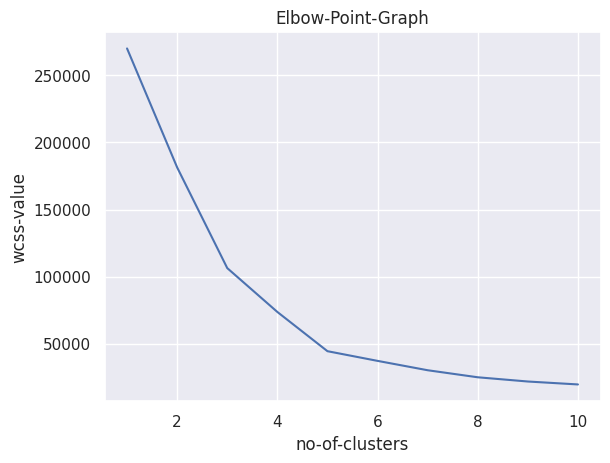

In [13]:
# plot an elbow graph, which no. of clusters have min value
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow-Point-Graph')
plt.xlabel('no-of-clusters')
plt.ylabel('wcss-value')
plt.show()

In [15]:
#INterpretation from elbow graph - optimum no. of clusters = 5

# Training the K-Means Clustering model
kMeans = KMeans(n_clusters=5, init='k-means++',random_state=0)

#return a label for each data point based on their cluster - each data point will get a cluster number 0-4
clusterLabel = kMeans.fit_predict(features)
print(clusterLabel, len(clusterLabel))




[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2] 200


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


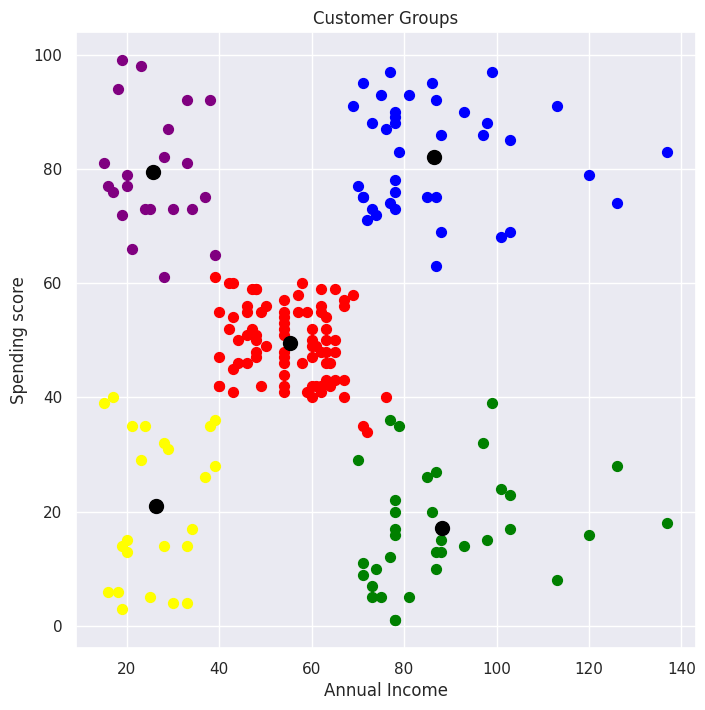

In [17]:
#Visualising all the clusters and their clusters
# features[clusterLabel == 0(cluster number),0(first column of features - annual income)]
# plt.scatter(features[clusterLabel == 0,0](x-axis), features[clusterLabel==0,1](y-axis), s=50(), c = "green", label='cluster-1')

plt.figure(figsize=(8,8))
plt.scatter(features[clusterLabel == 0,0], features[clusterLabel==0,1], s=50, c = "green", label='cluster-1')
plt.scatter(features[clusterLabel == 1,0], features[clusterLabel==1,1], s=50, c = "red", label='cluster-2')
plt.scatter(features[clusterLabel == 2,0], features[clusterLabel==2,1], s=50, c = "blue", label='cluster-3')
plt.scatter(features[clusterLabel == 3,0], features[clusterLabel==3,1], s=50, c = "purple", label='cluster-4')
plt.scatter(features[clusterLabel == 4,0], features[clusterLabel==4,1], s=50, c = "yellow", label='cluster-5')

#plot the centroids
# plt.scatter(kMeans.cluster_centers_[:,0](x-axis value of centroid),kMeans.cluster_centers_[:,1](yaxis value for centroid),s = 100, c = 'cyan', label='centroid')

plt.scatter(kMeans.cluster_centers_[:,0],kMeans.cluster_centers_[:,1],s = 100, c = 'black', label='centroid')


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()